Chebyshev interpolation nodes: [1.00508928 1.045184   1.12212521 1.22967959 1.35913372 1.5
 1.64086628 1.77032041 1.87787479 1.954816   1.99491072]

f(1.0050892790595336) = 0.6186668647260991
f(1.045184002322741) = 0.5668310283872543
f(1.122125212822871) = 0.47284101964234
f(1.2296795912722014) = 0.35232906944010417
f(1.3591337215792851) = 0.22190819290365163
f(1.5000000000000002) = 0.0954956965766155
f(1.6408662784207149) = -0.017176498287535258
f(1.7703204087277988) = -0.11033907009269511
f(1.877874787177129) = -0.18114344058113607
f(1.9548159976772592) = -0.22850335273933217
f(1.9949107209404664) = -0.2521756521564161

Pn(1.0384615384615385) = 0.5753798613680946
Pn(1.5384615384615385) = 0.0634609513799847
Pn(1.9384615384615385) = -0.21865340070032072

rn(1.0384615384615385) = 2.3166812912478463e-10
rn(1.5384615384615385) = -3.36182637283855e-10
rn(1.9384615384615385) = 2.603984250448832e-10

M: 254015.37460495

Expected deficiency: 2.2736561567474858e-09
Real deficiency on whole int

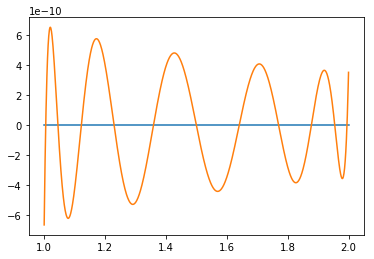

In [2]:
import numpy as np
from math import exp, log, factorial, cos, pi
import matplotlib.pyplot as plt

a = 1.0
b = 2.0
N = 10
delta = (b - a) / N
alpha = 1.7

points = [a + i * delta for i in range(N + 1)]

ChebyshevNodes = np.array([(a + b) / 2 + (b - a) * cos((2 * k + 1) * pi / (2 * (N + 1))) / 2 for k in range(N, -1, -1)],
                          dtype=np.double)

def f(x):
    return alpha * exp(-x) + (1 - alpha) * log(x)

def fDerivN1(x):
    return -1 ** (N + 1) * alpha * exp(-x) + (1 - alpha) * (-1 ** N) * factorial(N - 1) / x ** N

def maxDerivN1(samples):
    space = np.linspace(a, b, samples)
    return np.max(np.abs(np.array([(fDerivN1(x)) for x in space], dtype=np.double)))

def omega(k, x):
    global points
    result = 1
    for i in range(N + 1):
        if i != k:
            result *= (x - ChebyshevNodes[i])
    return result

def denominator(k):
    global points
    result = 1
    for i in range(N + 1):
        if i != k:
            result *= (ChebyshevNodes[k] - ChebyshevNodes[i])
    return result

def l(k):
    return lambda x: omega(k, x) / denominator(k)

def LagrangePolynomial(x):
    result = 0
    for i in range(N + 1):
        result += l(i)(x) * f(ChebyshevNodes[i])
    return result

def deficiency(x):
    return maxDerivN1(10000) * omega(-1, x) / factorial(N + 1)

def plotDifference(samples):
    space = np.linspace(a, b, samples)
    plt.plot(space, np.zeros(np.shape(space)))
    plt.plot(space, np.array([LagrangePolynomial(x) - f(x) for x in space], dtype=np.double))
    plt.show()

if __name__ == "__main__":
    print("Chebyshev interpolation nodes: " + str(ChebyshevNodes))
    print()
    
    [print("f({0}) = {1}".format(x, f(x))) for x in ChebyshevNodes]
    print()
    
    check = [points[0] + delta / 2.6, 
             points[5] + delta / 2.6,
             points[9] + delta / 2.6]
    
    [print("Pn({0}) = {1}".format(x, LagrangePolynomial(x))) for x in check]
    print()
    [print("rn({0}) = {1}".format(x, LagrangePolynomial(x) - f(x))) for x in check]
    print()

    print("M: " + str(maxDerivN1(10000)))
    print()
    
    print("Expected deficiency: " + 
          str(np.max(np.abs(np.array([(deficiency(x)) for x in check], dtype=np.double)))))
    
    space = np.linspace(a, b, 1000)
    print("Real deficiency on whole interval: " + 
          str(np.max(np.abs(np.array([(LagrangePolynomial(x) - f(x)) for x in space], dtype=np.double)))))
    print()
    
    print("Real deficiency on control points: " + 
          str(np.max(np.abs(np.array([(LagrangePolynomial(x) - f(x)) for x in check], dtype=np.double)))))
    
    plotDifference(1000)